## CSAI (Assignment-2)
### Akshit Sharma (2021101029)

### Allocation: Subject-4, X-Cats, Y-Bottles

In [295]:
import numpy as np
import pandas as pd
from nilearn import datasets,plotting
from nilearn.image import index_img
from nilearn.maskers import NiftiMasker
from scipy.stats import linregress
from tabulate import tabulate
from sklearn.metrics.pairwise import euclidean_distances,manhattan_distances,cosine_distances

In [296]:
data_files=datasets.fetch_haxby(subjects=[4])
func_filesnames=data_files.func[0]

In [297]:
behavioural=pd.read_csv(data_files.session_target[0],sep=" ")
mask=behavioural['labels'].isin(['rest'])
behavioural=behavioural[~mask]

In [298]:
fmri_img=index_img(func_filesnames,~mask)
masker=NiftiMasker(mask_img=data_files['mask_vt'][0])
fmri_data=masker.fit_transform(fmri_img)

/Users/akshitsharma/pytorch-test/env/lib/python3.8/site-packages/nilearn/image/resampling.py:493: UserWarning: The provided image has no sform in its header. Please check the provided file. Results may not be as expected.
  warnings.warn(


In [299]:
behavioural['labels'].unique()

array(['face', 'chair', 'scissors', 'shoe', 'scrambledpix', 'house',
       'cat', 'bottle'], dtype=object)

### PART-1 : Visualizing mean response patterns for each category overlaid (visualized) on the brain (anatomical image).

In [300]:
col_means = np.mean(fmri_data[behavioural['labels'].isin(['face','house','cat','bottle'])], axis=0) # grand mean
grand_mean=col_means
face_mask=behavioural['labels'].isin(['face'])
house_mask=behavioural['labels'].isin(['house'])
cats_mask=behavioural['labels'].isin(['cat'])
bottles_mask=behavioural['labels'].isin(['bottle'])
face_data=fmri_data[face_mask]
mean_removed_face_fmri=face_data-col_means
mean_face_data = np.mean(mean_removed_face_fmri, axis=0)
house_data=fmri_data[house_mask]
mean_removed_house_fmri=house_data-col_means
mean_house_data = np.mean(mean_removed_house_fmri, axis=0)
cat_data=fmri_data[cats_mask]
mean_removed_cat_fmri=cat_data-col_means
mean_cat_data = np.mean(mean_removed_cat_fmri, axis=0)
bottle_data=fmri_data[bottles_mask]
mean_removed_bottle_fmri=bottle_data-col_means
mean_bottle_data = np.mean(mean_removed_bottle_fmri, axis=0)
# face
face_even_data=face_data[::2]
mean_face_even_data=np.mean(face_even_data-col_means, axis=0)
face_odd_data=face_data[1::2]
mean_face_odd_data=np.mean(face_odd_data-col_means, axis=0)
# house
house_even_data=house_data[::2]
mean_house_even_data=np.mean(house_even_data-col_means, axis=0)
house_odd_data=house_data[1::2]
mean_house_odd_data=np.mean(house_odd_data-col_means, axis=0)
# cat
cat_even_data=cat_data[::2]
mean_cat_even_data=np.mean(cat_even_data-col_means, axis=0)
cat_odd_data=cat_data[1::2]
mean_cat_odd_data=np.mean(cat_odd_data-col_means, axis=0)
# bottle
bottle_even_data=bottle_data[::2]
mean_bottle_even_data=np.mean(bottle_even_data-col_means, axis=0)
bottle_odd_data=bottle_data[1::2]
mean_bottle_odd_data=np.mean(bottle_odd_data-col_means, axis=0)

mean_all_categories_odd=[mean_face_odd_data,mean_house_odd_data,mean_cat_odd_data,mean_bottle_odd_data]
mean_all_categories_even=[mean_face_even_data,mean_house_even_data,mean_cat_even_data,mean_bottle_even_data]

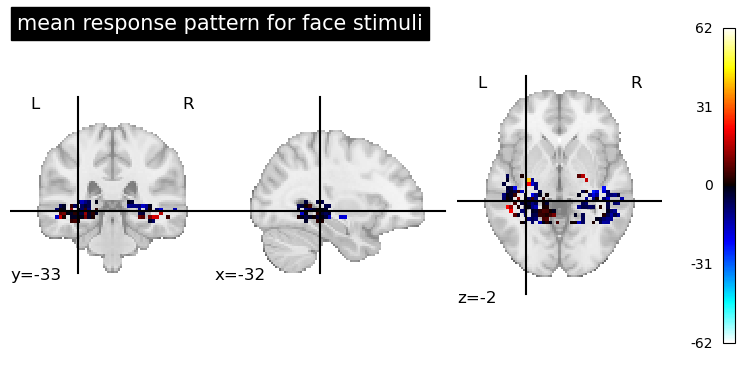

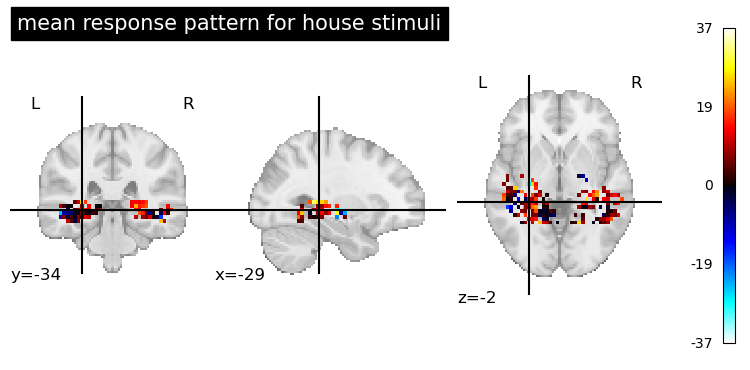

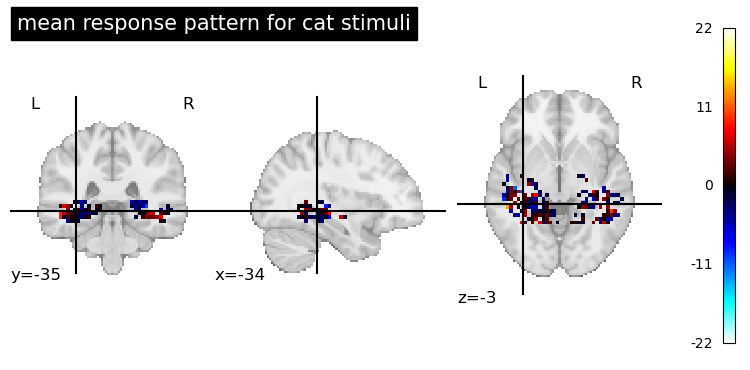

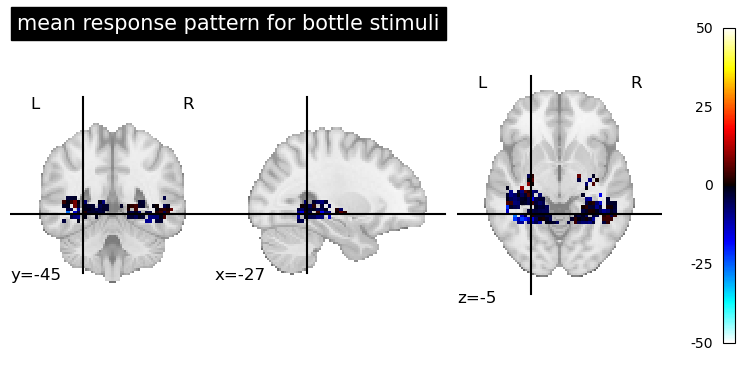

In [301]:
inverted_mean_response_face_img=masker.inverse_transform(mean_face_data)
plotting.plot_stat_map(inverted_mean_response_face_img,title='mean response pattern for face stimuli')
inverted_mean_response_house_img=masker.inverse_transform(mean_house_data)
plotting.plot_stat_map(inverted_mean_response_house_img,title='mean response pattern for house stimuli')
inverted_mean_response_cat_img=masker.inverse_transform(mean_cat_data)
plotting.plot_stat_map(inverted_mean_response_cat_img,title='mean response pattern for cat stimuli')
inverted_mean_response_bottle_img=masker.inverse_transform(mean_bottle_data)
plotting.plot_stat_map(inverted_mean_response_bottle_img,title='mean response pattern for bottle stimuli')
plotting.show()

### PART-2

In [302]:
categories=['face','house','cat','bottle']
mean_correlations = {}
std_errors = {}
correlation_table=[]
for i in range(0,4):
    row = []
    for j in range(0,4):
        correlation = np.corrcoef(mean_all_categories_even[i], mean_all_categories_odd[j])[0, 1]
        mean_correlations[(categories[i],categories[j])] = correlation
        slope, intercept, r_value, p_value, std_err = linregress(mean_all_categories_even[i], mean_all_categories_odd[j])
        std_errors[(categories[i], categories[j])] = std_err
        row.append(f"{correlation:.2f}+-{std_err:.2f}")
    correlation_table.append(row)

#### Mean correlations within and between categories (with standard error)

In [303]:
headers = [""] + categories
print(tabulate(correlation_table, headers=headers, showindex=categories, tablefmt="grid"))

+--------+-------------+-------------+-------------+-------------+
|        | face        | house       | cat         | bottle      |
+========+=============+=============+=============+=============+
| face   | 0.95+-0.01  | -0.77+-0.03 | 0.34+-0.02  | -0.40+-0.02 |
+--------+-------------+-------------+-------------+-------------+
| house  | -0.80+-0.02 | 0.95+-0.01  | -0.52+-0.01 | -0.11+-0.02 |
+--------+-------------+-------------+-------------+-------------+
| cat    | 0.15+-0.09  | -0.41+-0.09 | 0.69+-0.03  | -0.14+-0.06 |
+--------+-------------+-------------+-------------+-------------+
| bottle | -0.23+-0.06 | -0.28+-0.07 | -0.22+-0.03 | 0.83+-0.02  |
+--------+-------------+-------------+-------------+-------------+


#### The fMRI data can be divided based on odd and even runs for all categories. So, we have face, house, cat and bottle data for even runs vertically (across rows) and for odd runs horizontally (across columns). So, within a category, we find correlation using data for odd and even runs. Between categories, we find correlation values for odd vs even and even vs odd runs. That is why the matrix is not symmetric and the diagonal elements are not 1.

### PART-3

#### Representaion Dissimilarity Matrix (RDM) using Euclidean Distance

/Users/akshitsharma/pytorch-test/env/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:331: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


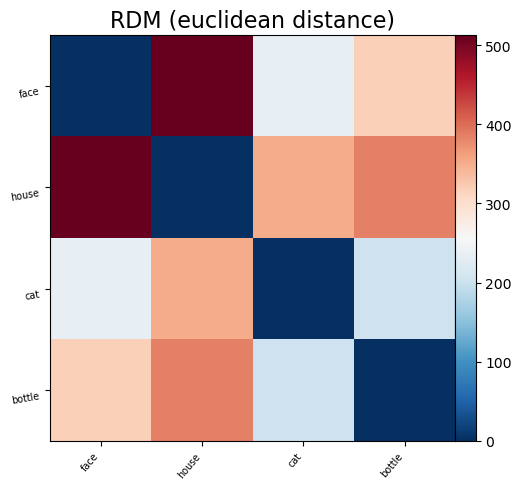

In [304]:
combined_fmri_data=np.vstack((mean_face_data,mean_house_data,mean_cat_data,mean_bottle_data))
distance_matrix = euclidean_distances(combined_fmri_data)
plotting.plot_matrix(distance_matrix, labels=categories, colorbar=True, title='RDM (euclidean distance)')
plotting.show()

#### Representaion Dissimilarity Matrix (RDM) using Manhattan Distance

/Users/akshitsharma/pytorch-test/env/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:331: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


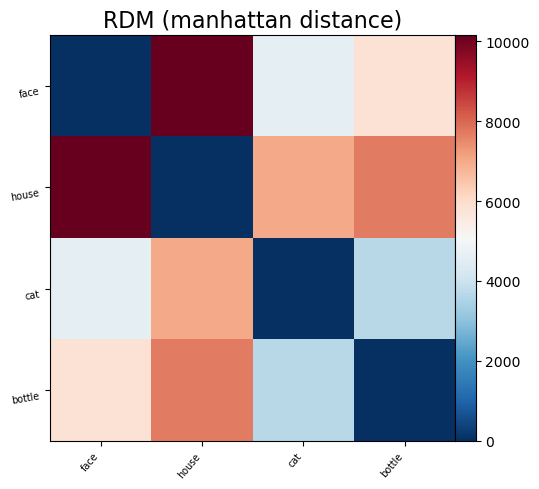

In [305]:
combined_fmri_data=np.vstack((mean_face_data,mean_house_data,mean_cat_data,mean_bottle_data))
distance_matrix = manhattan_distances(combined_fmri_data)
plotting.plot_matrix(distance_matrix, labels=categories, colorbar=True, title='RDM (manhattan distance)')
plotting.show()

#### Representaion Dissimilarity Matrix (RDM) using Cosine Distance

/Users/akshitsharma/pytorch-test/env/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:331: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


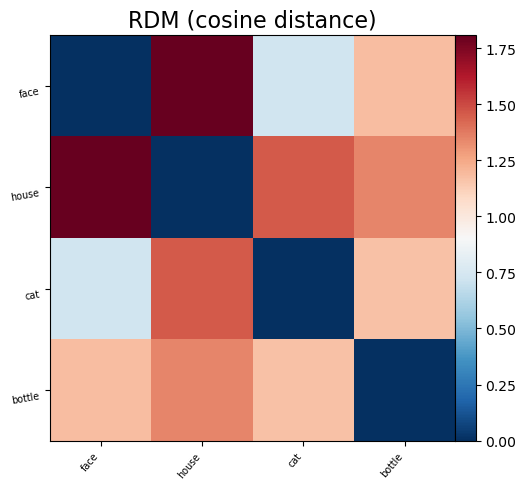

In [306]:
combined_fmri_data=np.vstack((mean_face_data,mean_house_data,mean_cat_data,mean_bottle_data))
distance_matrix = cosine_distances(combined_fmri_data)
plotting.plot_matrix(distance_matrix, labels=categories, colorbar=True, title='RDM (cosine distance)')
plotting.show()